<a href="https://colab.research.google.com/github/RogerzribeiroAlura8/TelecomX/blob/main/telecomx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
import pandas as pd

In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/main/TelecomX_Data.json"

df = pd.read_json(url)
print(f"{df.shape[0]} linhas e {df.shape[1]} colunas")
display(df.head())

7267 linhas e 6 colunas


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [ ]:
# Verificar valores ausentes
print("Valores ausentes por coluna:")
print(df.isnull().sum())

# Remover colunas irrelevantes (se houver)
colunas_descartar = ['customerID']  # Exemplo
df = df.drop(columns=colunas_descartar, errors='ignore')

# Tratar valores nulos simples (exemplo: preencher com a média)
df = df.fillna(df.mean(numeric_only=True))

# Conferir resultado
df.info()

Valores ausentes por coluna:
customerID    0
Churn         0
customer      0
phone         0
internet      0
account       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Churn     7267 non-null   object
 1   customer  7267 non-null   object
 2   phone     7267 non-null   object
 3   internet  7267 non-null   object
 4   account   7267 non-null   object
dtypes: object(5)
memory usage: 284.0+ KB


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Copiar dataset para não alterar o original
dados = df.copy()

# Codificar variáveis categóricas em números
le = LabelEncoder()
for col in dados.columns:
    dados[col] = le.fit_transform(dados[col])

# Separar variáveis independentes (X) e dependente (y)
X = dados.drop('Churn', axis=1)
y = dados['Churn']

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar e treinar o modelo
modelo = DecisionTreeClassifier(random_state=42)
modelo.fit(X_train, y_train)

# Fazer previsões
y_pred = modelo.predict(X_test)

# Avaliar
print(classification_report(y_test, y_pred))

# Matriz de confusão visual
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

TypeError: Encoders require their input argument must be uniformly strings or numbers. Got ['dict']

In [ ]:
# Identificar quais colunas têm dicionários
for col in df.columns:
    tipos = df[col].apply(type).unique()
    print(col, tipos)


Churn [<class 'str'>]
customer [<class 'dict'>]
phone [<class 'dict'>]
internet [<class 'dict'>]
account [<class 'dict'>]


In [ ]:
# Exemplo para expandir coluna 'internet' se ela contiver dicts
if df['internet'].apply(lambda x: isinstance(x, dict)).any():
    internet_expandido = pd.json_normalize(df['internet'])
    internet_expandido.columns = [f"internet_{c}" for c in internet_expandido.columns]
    df = pd.concat([df.drop(columns=['internet']), internet_expandido], axis=1)

# Repetir esse processo para outras colunas com dicts

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        45
           1       0.78      0.76      0.77      1037
           2       0.45      0.44      0.45       372

    accuracy                           0.66      1454
   macro avg       0.41      0.40      0.41      1454
weighted avg       0.68      0.66      0.67      1454



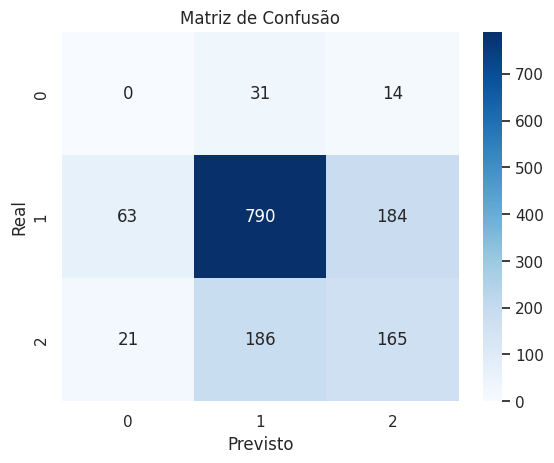

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

dados = df.copy()

# Codificar colunas categóricas
le = LabelEncoder()
for col in dados.columns:
    if dados[col].dtype == 'object':
        dados[col] = le.fit_transform(dados[col].astype(str))

# Separar variáveis
X = dados.drop('Churn', axis=1)
y = dados['Churn']

# Treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo
modelo = DecisionTreeClassifier(random_state=42)
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)

# Avaliação
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

In [ ]:
print(df['Churn'].value_counts())

Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64


In [ ]:
# Exemplo: supondo que "Yes" e "Sim" sejam churn
df['Churn_bin'] = df['Churn'].apply(lambda x: 1 if str(x).lower() in ['yes', 'sim'] else 0)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

# 1. Conferir distribuição original
print(df['Churn'].value_counts())

# 2. Criar variável binária: 1 = saiu, 0 = não saiu
df['Churn_bin'] = df['Churn'].apply(lambda x: 1 if str(x).strip().lower() in ['yes', 'sim'] else 0)

print(df['Churn_bin'].value_counts())

# Expand columns with dictionary values
for col in ['customer', 'phone', 'account']:
    if df[col].apply(lambda x: isinstance(x, dict)).any():
        expanded_col = pd.json_normalize(df[col])
        expanded_col.columns = [f"{col}_{c}" for c in expanded_col.columns]
        df = pd.concat([df.drop(columns=[col]), expanded_col], axis=1)

# Convert remaining object columns to string and then encode
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].astype(str)
        # Optional: You can use LabelEncoder or OneHotEncoder here if needed for other object columns
        # from sklearn.preprocessing import LabelEncoder
        # le = LabelEncoder()
        # df[col] = le.fit_transform(df[col])


# 3. Separar features e alvo
X = df.drop(['Churn', 'Churn_bin'], axis=1)
y = df['Churn_bin']

# Convert all columns in X to numeric, coercing errors
X = X.apply(pd.to_numeric, errors='coerce')

# Handle potential NaN values created by coercion (e.g., fill with 0 or mean)
X = X.fillna(0) # Or X.fillna(X.mean())

# 4. Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Treinar modelo
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# 6. Previsões
y_pred = clf.predict(X_test)

# 7. Resultados
print(f"Acurácia: {accuracy_score(y_test, y_pred):.2%}")
print(classification_report(y_test, y_pred))

Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64
Churn_bin
0    5398
1    1869
Name: count, dtype: int64


TypeError: float() argument must be a string or a real number, not 'dict'

In [ ]:
{'id': '12345', 'type': 'mobile'}

{'id': '12345', 'type': 'mobile'}

In [ ]:
import pandas as pd

# Supondo que df seja seu DataFrame original

# Lista de colunas que contêm dicts
cols_dict = ['customer', 'phone', 'account']

for col in cols_dict:
    # Expande dicionário em novas colunas com prefixo
    expanded = pd.json_normalize(df[col])
    expanded.columns = [f"{col}_{subcol}" for subcol in expanded.columns]
    df = pd.concat([df.drop(columns=[col]), expanded], axis=1)

# Agora df só terá colunas numéricas/strings simples

In [ ]:
df.dtypes

,0
Churn,object
internet_InternetService,object
internet_OnlineSecurity,object
internet_OnlineBackup,object
internet_DeviceProtection,object
internet_TechSupport,object
internet_StreamingTV,object
internet_StreamingMovies,object
Churn_bin,int64
customer_gender,object


In [ ]:
import pandas as pd

# 1. Conferir colunas object
print(df.select_dtypes(include='object').columns)

# 2. Converter campos numéricos que estão como texto
df['account_Charges.Total'] = pd.to_numeric(df['account_Charges.Total'], errors='coerce')

# 3. Fazer One-Hot Encoding para colunas categóricas
df_encoded = pd.get_dummies(df, drop_first=True)

print(df_encoded.dtypes)  # Tudo deve ser numérico agora

Index(['Churn', 'internet_InternetService', 'internet_OnlineSecurity',
       'internet_OnlineBackup', 'internet_DeviceProtection',
       'internet_TechSupport', 'internet_StreamingTV',
       'internet_StreamingMovies', 'customer_gender', 'customer_Partner',
       'customer_Dependents', 'phone_PhoneService', 'phone_MultipleLines',
       'account_Contract', 'account_PaperlessBilling', 'account_PaymentMethod',
       'account_Charges.Total'],
      dtype='object')
Churn_bin                                          int64
customer_SeniorCitizen                             int64
customer_tenure                                    int64
account_Charges.Monthly                          float64
account_Charges.Total                            float64
Churn_No                                            bool
Churn_Yes                                           bool
internet_InternetService_Fiber optic                bool
internet_InternetService_No                         bool
internet_OnlineS

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

X = df_encoded.drop('Churn_bin', axis=1)
y = df_encoded['Churn_bin']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(f"Acurácia: {accuracy_score(y_test, y_pred):.2%}")
print(classification_report(y_test, y_pred))

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# ==== 1. Expansão das colunas com dict ====
cols_dict = ['customer', 'phone', 'account']

for col in cols_dict:
    expanded = pd.json_normalize(df[col])
    expanded.columns = [f"{col}_{subcol}" for subcol in expanded.columns]
    df = pd.concat([df.drop(columns=[col]), expanded], axis=1)

# ==== 2. Converter coluna numérica que está como texto ====
df['account_Charges.Total'] = pd.to_numeric(df['account_Charges.Total'], errors='coerce')

# ==== 3. Criar variável binária para Churn ====
df['Churn_bin'] = df['Churn'].apply(lambda x: 1 if str(x).strip().lower() in ['yes', 'sim'] else 0)

# ==== 4. One-Hot Encoding para colunas categóricas ====
df_encoded = pd.get_dummies(df, drop_first=True)

# ==== 5. Separar features e alvo ====
X = df_encoded.drop('Churn_bin', axis=1)
y = df_encoded['Churn_bin']

# ==== 6. Train/Test Split ====
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ==== 7. Treinamento ====
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# ==== 8. Avaliação ====
y_pred = clf.predict(X_test)

print(f"Acurácia: {accuracy_score(y_test, y_pred):.2%}")
print(classification_report(y_test, y_pred))

KeyError: 'customer'

In [ ]:
print(df.columns.tolist())

['Churn', 'internet_InternetService', 'internet_OnlineSecurity', 'internet_OnlineBackup', 'internet_DeviceProtection', 'internet_TechSupport', 'internet_StreamingTV', 'internet_StreamingMovies', 'Churn_bin', 'customer_gender', 'customer_SeniorCitizen', 'customer_Partner', 'customer_Dependents', 'customer_tenure', 'phone_PhoneService', 'phone_MultipleLines', 'account_Contract', 'account_PaperlessBilling', 'account_PaymentMethod', 'account_Charges.Monthly', 'account_Charges.Total']


In [ ]:
import pandas as pd

# Lista base que gostaríamos de expandir
cols_dict = ['customer', 'phone', 'account']

for col in cols_dict:
    if col in df.columns:  # Só tenta expandir se a coluna existir
        expanded = pd.json_normalize(df[col])
        expanded.columns = [f"{col}_{subcol}" for subcol in expanded.columns]
        df = pd.concat([df.drop(columns=[col]), expanded], axis=1)

# Depois disso, segue com as conversões e encoding
df['account_Charges.Total'] = pd.to_numeric(df['account_Charges.Total'], errors='coerce')
df['Churn_bin'] = df['Churn'].apply(lambda x: 1 if str(x).strip().lower() in ['yes', 'sim'] else 0)
df_encoded = pd.get_dummies(df, drop_first=True)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# ==== 1. Lista de colunas que podem ter dicts ====
cols_dict = ['customer', 'phone', 'account']

for col in cols_dict:
    if col in df.columns:  # Expande só se existir
        expanded = pd.json_normalize(df[col])
        expanded.columns = [f"{col}_{subcol}" for subcol in expanded.columns]
        df = pd.concat([df.drop(columns=[col]), expanded], axis=1)

# ==== 2. Converter colunas numéricas que estão como texto ====
if 'account_Charges.Total' in df.columns:
    df['account_Charges.Total'] = pd.to_numeric(df['account_Charges.Total'], errors='coerce')

# ==== 3. Criar variável binária para Churn ====
if 'Churn' in df.columns:
    df['Churn_bin'] = df['Churn'].apply(lambda x: 1 if str(x).strip().lower() in ['yes', 'sim'] else 0)

# ==== 4. One-Hot Encoding para colunas categóricas ====
df_encoded = pd.get_dummies(df, drop_first=True)

# ==== 5. Separar features e alvo ====
X = df_encoded.drop('Churn_bin', axis=1)
y = df_encoded['Churn_bin']

# ==== 6. Train/Test Split ====
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ==== 7. Treinamento ====
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# ==== 8. Avaliação ====
y_pred = clf.predict(X_test)

print(f"Acurácia: {accuracy_score(y_test, y_pred):.2%}")
print(classification_report(y_test, y_pred))

Acurácia: 100.00%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1082
           1       1.00      1.00      1.00       372

    accuracy                           1.00      1454
   macro avg       1.00      1.00      1.00      1454
weighted avg       1.00      1.00      1.00      1454

